In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
from sklearn.model_selection import train_test_split

X = pd.read_csv('./data/xtrain.csv')
y = pd.read_csv('./data/ytrain.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_control = pd.read_csv('./data/xtest.csv')
y_control = pd.read_csv('./data/ytest.csv')

In [3]:
from sklearn.metrics import r2_score

def get_r2(model, train=True):

    model.fit(X_train, y_train)
    if train:
        train_pred = model.predict(X_train)
        return r2_score(y_train, train_pred)
    else:
        test_pred = model.predict(X_test)   
        return r2_score(y_test, test_pred)


def create_plot(name, iterator, train, test):

    plt.plot(iterator, train_results, '#ff9900', label='Train R2')
    plt.plot(iterator, test_results, '#ffc1de', label='Test R2')
    plt.title(f'R2 vs {name}')
    plt.legend()
    plt.ylabel('$R^2$')
    plt.xlabel(f'{name}')
    plt.show()


def create_table(name, iterator, train, test):

    results = pd.DataFrame()
    results[name] = iterator
    results['TrainScore'] = train_results
    results['TestScore'] = test_results
    return results


In [4]:
from sklearn.ensemble import RandomForestRegressor

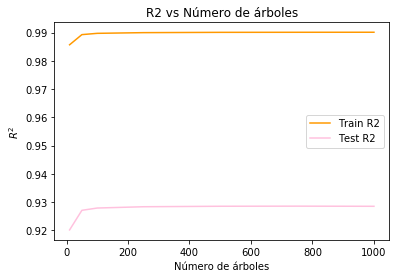

In [7]:
#### Número de estimadores ####

n_estimators = [10, 50, 100, 250, 500, 750, 1000]
name = 'Número de árboles'
iterator = n_estimators

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(n_estimators=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))


result_ne = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results) 

In [8]:
result_ne

,Número de árboles,TrainScore,TestScore
0,10,0.985704,0.920133
1,50,0.989299,0.927074
2,100,0.989755,0.927884
3,250,0.989999,0.928340
4,500,0.990104,0.928514
5,750,0.990127,0.928549
6,1000,0.990141,0.928500


In [13]:
#### Max depth ####

max_depth = [6, 8, 10, 12, 15, 20, 50, 100]
name = 'Profundidad'
iterator = max_depth

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(max_depth=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

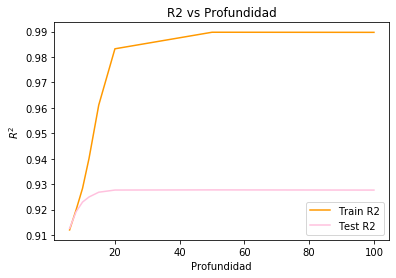

In [14]:
result_md = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [15]:
result_md

,Profundidad,TrainScore,TestScore
0,6,0.912020,0.912602
1,8,0.919845,0.919135
2,10,0.928381,0.922972
3,12,0.940118,0.924971
4,15,0.961090,0.926840
5,20,0.983228,0.927696
6,50,0.989736,0.927756
7,100,0.989694,0.927684


El máximo valor permisible antes del overfitting es max_depth=12, aunque esto solo mejora el modelo en 0.002 respecto al valor de max_depth=10.

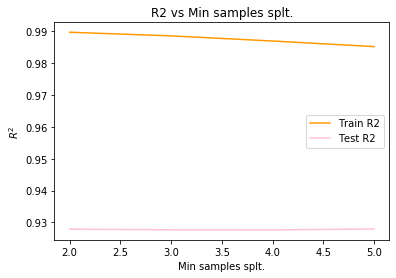

In [20]:
#### Mínimo número de muestras para dividir un nodo ####

min_samples_split = [2,3,4,5]
name = 'Min samples splt.'
iterator = min_samples_split

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(min_samples_split=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_mss = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [21]:
result_mss

,Min samples splt.,TrainScore,TestScore
0,2,0.989719,0.927852
1,3,0.988580,0.927657
2,4,0.986963,0.927619
3,5,0.985209,0.927918


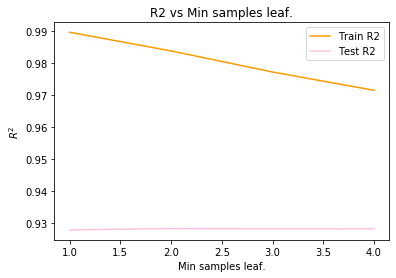

In [22]:
#### Mínimo número de muestras crear un nodo ####

min_samples_leaf = [1, 2, 3, 4]
name = 'Min samples leaf.'
iterator = min_samples_leaf

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(min_samples_leaf=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_msl = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [23]:
result_msl

,Min samples leaf.,TrainScore,TestScore
0,1,0.989721,0.927780
1,2,0.983862,0.928223
2,3,0.977258,0.928133
3,4,0.971531,0.928106


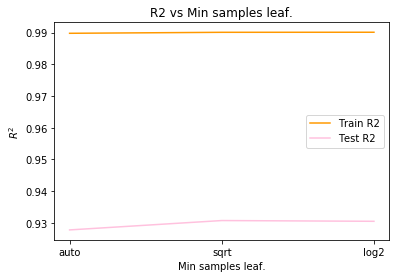

In [24]:
#### Número de features máximo. ####

max_features = ['auto', 'sqrt', 'log2']
name = 'Min samples leaf.'
iterator = max_features

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(max_features=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_mf = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [25]:
result_mf

,Min samples leaf.,TrainScore,TestScore
0,auto,0.989760,0.927755
1,sqrt,0.990071,0.930710
2,log2,0.990091,0.930474


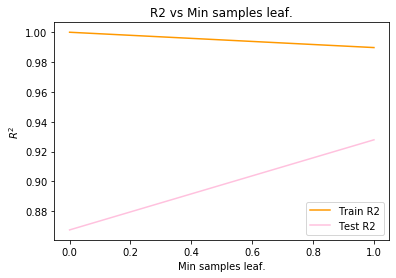

In [26]:
#### Bootstrap. ####

bootstrap = [True, False]
name = 'Min samples leaf.'
iterator = bootstrap

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(bootstrap=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_boo = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [27]:
result_boo

,Min samples leaf.,TrainScore,TestScore
0,True,0.98972,0.927857
1,False,1.00000,0.867417


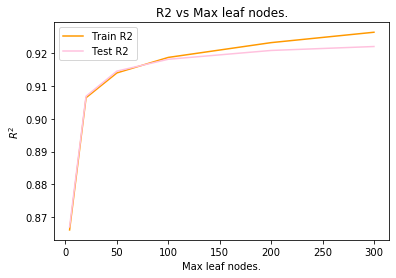

In [32]:
#### max_leaf_nodes. ####

max_leaf_nodes = [None, 4, 20, 50, 100, 200, 300]
name = 'Max leaf nodes.'
iterator = max_leaf_nodes

# Get scores and plot
train_results = []
test_results = []
for value in iterator:
    model = RandomForestRegressor(max_leaf_nodes=value)
    train_results.append(get_r2(model))
    test_results.append(get_r2(model, train=False))

result_mln = create_table(name, iterator, train_results, test_results)
create_plot(name, iterator, train_results, test_results)

In [33]:
result_mln

,Max leaf nodes.,TrainScore,TestScore
0,NaN,0.989765,0.928022
1,4.0,0.866144,0.867073
2,20.0,0.906425,0.906882
3,50.0,0.913990,0.914534
4,100.0,0.918710,0.918146
5,200.0,0.923216,0.920832
6,300.0,0.926380,0.922030


#### Tunning Random Forest Regressor

In [43]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(
    min_samples_leaf=2,
    bootstrap=True,
    n_estimators=120,
)

params = {
    'min_samples_split' : [2, 4, 6],
    'max_leaf_nodes': [300, 500, 600],
    'max_depth': [8, 12, 14],
}

gscv = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=5
)
gscv.fit(X, y)

.
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=4, score=0.919, total= 2.2min
[CV] max_depth=8, max_leaf_nodes=300, min_samples_split=6 ............
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=6, score=0.916, total= 2.1min
[CV] max_depth=8, max_leaf_nodes=300, min_samples_split=6 ............
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=6, score=0.917, total= 2.2min
[CV] max_depth=8, max_leaf_nodes=300, min_samples_split=6 ............
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=6, score=0.919, total= 2.2min
[CV] max_depth=8, max_leaf_nodes=300, min_samples_split=6 ............
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=6, score=0.919, total= 2.2min
[CV] max_depth=8, max_leaf_nodes=300, min_samples_split=6 ............
[CV]  max_depth=8, max_leaf_nodes=300, min_samples_split=6, score=0.919, total= 2.1min
[CV] max_depth=8, max_leaf_nodes=500, min_samples_split=2 ............
[CV]  max_depth=8, max_leaf_nodes=500, min_samples

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=120, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
# Results
print('='*100)
print('Best Score:', gscv.best_score_)
print('Best params:', gscv.best_params_)
print('\nBest estimator', gscv.best_estimator_)
print('='*100)

Best Score: 0.9227462797030981
Best params: {'max_depth': 12, 'max_leaf_nodes': 600, 'min_samples_split': 2}

Best estimator RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=600,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [46]:
from sklearn.metrics import r2_score

BestRFR = gscv.best_estimator_
prediction = BestRFR.predict(X)
score = r2_score(y, prediction)

control_prediction = BestRFR.predict(X_control)
control_score = r2_score(y_control, control_prediction)

print('='*100, '\nTrain data')
print('R2 = ', score)
print('='*100)

print('='*100, '\nControl data')
print('R2 = ', control_score)
print('='*100)

Train data
R2 =  0.9304561452589124
Control data
R2 =  0.923766827643098


In [47]:
from sklearn.metrics import (
    mean_squared_error,
    explained_variance_score,
    max_error,
    mean_absolute_error,
    median_absolute_error,
    mean_squared_log_error
) 

prediction[prediction < 0] = 0
control_prediction[control_prediction < 0] = 0

scores = {
    'MSE': mean_squared_error,
    'EVS': explained_variance_score,
    'ME': max_error,
    'MAE': mean_absolute_error,
    'MeAE': median_absolute_error,
    'MSLE': mean_squared_log_error,
    'R2': r2_score
}

for name, score in scores.items():
    print('='*100)
    print('---', name, '---')
    print('Train data')
    print('R2 = ', score(y, prediction))
    print('Control data')
    print('R2 = ', score(y_control, control_prediction))
    print('='*100)

--- MSE ---
Train data
R2 =  7376.1648262636245
Control data
R2 =  8083.5927712565735
--- EVS ---
Train data
R2 =  0.9304562545470731
Control data
R2 =  0.923766868968972
--- ME ---
Train data
R2 =  840.7688837967241
Control data
R2 =  856.374398802396
--- MAE ---
Train data
R2 =  41.041916351797454
Control data
R2 =  42.42623382546443
--- MeAE ---
Train data
R2 =  0.08638045448249451
Control data
R2 =  0.08638045448249451
--- MSLE ---
Train data
R2 =  0.18917841004473196
Control data
R2 =  0.19402266129287002
--- R2 ---
Train data
R2 =  0.9304561452589124
Control data
R2 =  0.923766827643098
